In [73]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML datasets/ML A3'
%ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML datasets/ML A3
'Dataset Description.csv'   model22.pkl       model_50k20.pkl
 model10.pkl                model23.pkl       model_50k21.pkl
 model11.pkl                model24.pkl       model_50k22.pkl
 model12.pkl                model_50k10.pkl   model_50k23.pkl
 model13.pkl                model_50k11.pkl   model_50k24.pkl
 model14.pkl                model_50k12.pkl  'model 78'/
 model15.pkl                model_50k13.pkl   model_82/
 model16.pkl                model_50k14.pkl   more_than_50k.csv
 model17.pkl                model_50k15.pkl   population.csv
 model18.pkl                model_50k16.pkl   Q1_2.pdf
 model19.pkl                model_50k17.pkl   Q1_2.png
 model20.pkl                model_50k18.pkl
 model21.pkl                model_50k19.pkl


In [74]:
!pip install pyclustering

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

#Read data
population_data=pd.read_csv('population.csv')
more_than_50k_data=pd.read_csv('more_than_50k.csv')
description_data=pd.read_csv('Dataset Description.csv')

In [76]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [77]:
#Part-1.1
new_pop_data=population_data.replace(' ?',np.nan)
null_vals=new_pop_data.isnull().sum()
print(null_vals)

#Part-1.2
allowed_null_vals=(population_data.shape[0])*0.4
ind=0
indx=[]
for i in null_vals:
  if i>allowed_null_vals:
    indx.append(ind)
  ind=ind+1
  
#Drop columns
new_population_data=new_pop_data.drop(columns=new_pop_data.columns[indx])
more_than_50k_data=more_than_50k_data.drop(columns=new_pop_data.columns[indx])
print(new_population_data.shape,population_data.shape)


AAGE            0
ACLSWKR         0
ADTIND          0
ADTOCC          0
AHGA            0
AHRSPAY         0
AHSCOL          0
AMARITL         0
AMJIND          0
AMJOCC          0
ARACE           0
AREORGN         0
ASEX            0
AUNMEM          0
AUNTYPE         0
AWKSTAT         0
CAPGAIN         0
CAPLOSS         0
DIVVAL          0
FILESTAT        0
GRINREG         0
GRINST        708
HHDFMX          0
HHDREL          0
MIGMTR1     99696
MIGMTR3     99696
MIGMTR4     99696
MIGSAME         0
MIGSUN      99696
NOEMP           0
PARENT          0
PEFNTVTY     6713
PEMNTVTY     6119
PENATVTY     3393
PRCITSHP        0
SEOTR           0
VETQVA          0
VETYN           0
WKSWORK         0
YEAR            0
dtype: int64
(199523, 36) (199523, 40)


In [78]:
##Part-2.1
new_population_data.head(5)
fig, ax = plt.subplots(6, 6)
j=0
k=0
for i in new_population_data.columns:
  new_population_data[i].value_counts().plot(kind='hist',ax=ax[j][k],figsize=(250,250),fontsize=80,legend=True).set_title(i,size=90)
  if k==5:
    k=0
    j=j+1
  else:
    k=k+1
fig.show()
fig.savefig('Q1_2.png')
fig.savefig('Q1_2.pdf')


##Part-2.2
#Remove cols with 80% data in single entity
rem_cols=[]
for i in new_population_data.columns:
  if (new_population_data[i].value_counts().max()/(new_population_data.shape[0]))>=0.80:
    rem_cols.append(i)

new_population_data.drop(columns=rem_cols,inplace=True)
more_than_50k_data.drop(columns=rem_cols,inplace=True) #For part-5

print(new_population_data.shape)

(199523, 20)


In [79]:
#Part-3

#Part-3.1
#Replacing values in each col with there mode
for i in new_population_data.columns[new_population_data.isna().any()]:
  mode=new_population_data[i].mode()[0]
  new_population_data[i].fillna(mode,inplace=True)
  more_than_50k_data[i].fillna(mode,inplace=True)

print(new_population_data.isna().sum())

#Part-3.2
#Bucketize Numerical features
print(new_population_data.describe())

#Numerical data
cols_to_bin=['AAGE','WKSWORK']

for i in cols_to_bin:
  data=new_population_data[i]
  maxi=data.max()
  mini=data.min()
  #Calculate 4 bins of equal distribution
  bin=np.linspace(mini,maxi+1,4)
  new_population_data[i]=pd.cut(x=data,bins=bin,right=False).cat.codes

  #for more_than_50k_data
  maxi2=more_than_50k_data[i].max()
  mini2=more_than_50k_data[i].min()
  bin2=np.linspace(mini2,maxi2+1,4)
  more_than_50k_data[i]=pd.cut(x=more_than_50k_data[i],bins=bin2,right=False).cat.codes


#Part-3.3
# One hot encode features
cat_col_list=list(new_population_data.columns)
for i in cols_to_bin:
  cat_col_list.remove(i)

hot_encode=pd.get_dummies(new_population_data,columns=cat_col_list)
hot_encode_more_than_50k_data=pd.get_dummies(more_than_50k_data,columns=cat_col_list)

print(hot_encode.shape)

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
PARENT      0
PEFNTVTY    0
VETYN       0
WKSWORK     0
YEAR        0
dtype: int64
                AAGE         ADTIND         ADTOCC          NOEMP          VETYN        WKSWORK           YEAR
count  199523.000000  199523.000000  199523.000000  199523.000000  199523.000000  199523.000000  199523.000000
mean       34.494199      15.352320      11.306556       1.956180       1.514833      23.174897      94.499672
std        22.310895      18.067129      14.454204       2.365126       0.851473      24.411488       0.500001
min         0.000000       0.000000       0.000000       0.000000       0.000000       0.000000      94.000000
25%        15.000000       0.000000       0.000000       0.000000       2.000000       0.000000      94.000000
50%        33.000000       0.000000      

In [80]:
from sklearn.decomposition import PCA

pca=PCA(0.80)
pca=pca.fit(hot_encode)
pca_data=pca.transform(hot_encode)
pca_data_df=pd.DataFrame(pca_data)

#For more than 50k
pca2=PCA(0.80)
pca2=pca2.fit(hot_encode_more_than_50k_data)
pca_data2=pca2.transform(hot_encode_more_than_50k_data)
pca_data_df2=pd.DataFrame(pca_data2)

In [81]:
print(hot_encode.shape)
print(pca_data.shape)

print(hot_encode_more_than_50k_data.shape)
print(pca_data2.shape)

(199523, 297)
(199523, 26)
(3580, 254)
(3580, 34)


In [83]:
#Part-4
from pyclustering.cluster.kmedians import kmedians
import pickle

samples=pca_data_df.copy()
cluster=[]

for k in range(10,25):
  cluster.append(k)

# ans_final=[]

for k in cluster:
  seeds=np.random.RandomState(0).permutation(samples.shape[1])[:k]
  centers=samples.iloc[seeds]
  fname='model'+str(k+1)+'.pkl'

  Train models
  model=kmedians(samples,centers)
  model.process() 
  
  #Save models
  with open(fname,'wb') as myfile:
    pickle.dump(model,myfile)

  #Select trained models
  # with open(fname,'rb') as myfile:
  #   model=pickle.load(myfile)
  # ans_final.append(model.get_total_wce()/k)
print(ans_final)

[139564.81278467007, 121414.15644633761, 116614.89241569447, 109000.19661787974, 80145.46480987668, 79737.31174629285, 79678.97381217888, 69578.66931545633, 65713.18768681987, 58540.96364592163, 55625.23076954232, 54435.43640944459, 51961.098390833475, 47272.204042469726, 46660.320181198425]


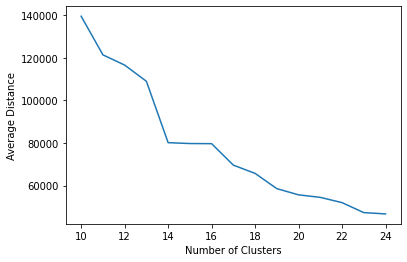

In [85]:
#Plot elbow graph
plt.plot(cluster, ans_final)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.show()

From the above graph, we choose the value of k=20

In [86]:
#Selecting the best model
with open('model21.pkl','rb') as myfile:
  best_model=pickle.load(myfile)
best_model

In [87]:
#Part-5
#Part-4
from pyclustering.cluster.kmedians import kmedians
import pickle

samples=pca_data_df2.copy()
cluster=[]

for k in range(10,25):
  cluster.append(k)

ans_final2=[]

for k in cluster:
  seeds=np.random.RandomState(1).permutation(samples.shape[1])[:k]
  centers=samples.iloc[seeds]
  #print(centers)
  model=kmedians(samples,centers)
  model.process() 
  #Save model
  # fname='model_50k'+str(k)+'.pkl'
  # with open(fname,'wb') as myfile:
  #   pickle.dump(model,myfile)
  ans_final2.append(model.get_total_wce()/k)
print(ans_final2)

[3466.0586304962117, 3075.1851024087373, 2923.52578192343, 2581.7592350260497, 2329.7810123303107, 2358.156605763682, 1760.4489055089437, 1929.1141430431642, 1903.5887153817675, 1582.878679019476, 1361.3406489915387, 1305.1595650396803, 1205.84825262504, 1286.52247498697, 1217.2166547636064]


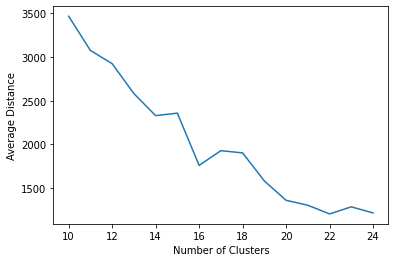

In [88]:
#Plot elbow graph
plt.plot(cluster, ans_final2)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.show()

From the above graph, we choose the value of k=20.

In [89]:
#Selecting the best model
with open('model_50k20.pkl','rb') as myfile:
  best_model_50k=pickle.load(myfile)
best_model_50k

In [90]:
#Part-6
best_genpop_results=best_model.predict(pca_data)
best_50k_results=best_model_50k.predict(pca_data2)
best_genpop_results=pd.Series(best_genpop_results)
best_50k_results=pd.Series(best_50k_results)
df1=pd.DataFrame(best_genpop_results.value_counts().sort_index(),columns=['General Population'])
df2=pd.DataFrame(best_50k_results.value_counts().sort_index(),columns=['50k population'])

In [91]:
df1.shape,df2.shape

((20, 1), (20, 1))

<Figure size 720x720 with 0 Axes>

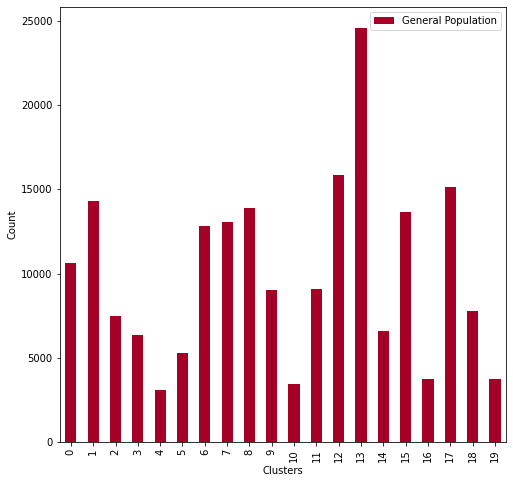

<Figure size 720x720 with 0 Axes>

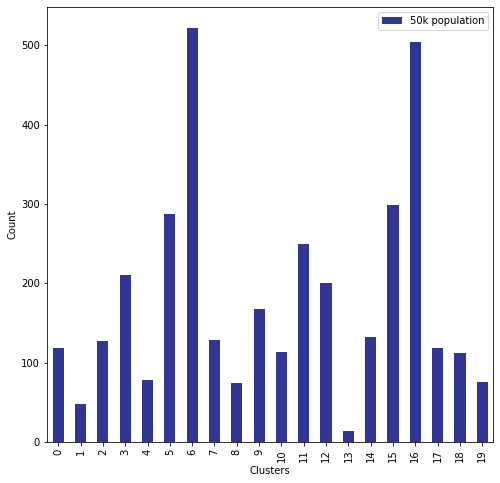

In [92]:
#Part-6.1
plt.figure(figsize=(10,10))
# fig, (ax1, ax2) = plt.subplots(1, 2)
df1.plot(kind='bar',xlabel='Clusters',ylabel='Count',colormap='RdYlGn',legend=True,figsize=(8,8))
plt.show()

plt.figure(figsize=(10,10))
df2.plot(kind='bar',xlabel='Clusters',ylabel='Count',colormap='RdYlBu_r',legend=True,figsize=(8,8))
plt.show()
# fig.show()

In [93]:
#Part-6.2
total1=df1.sum()[0]
total2=df2.sum()[0]

cluster=0
#Print results
print('Over-representation with respect to General Population in 50k Population')
for i in df2['50k population']:
  diff=i/total2
  diff=(diff-df1['General Population'][cluster]/total1)
  diff=diff*100
  if diff>0:
    print(f'Cluster {cluster+1} is over-represented by {diff}%')
  cluster=cluster+1

cluster=0
print('\n\nOver-representation with respect to 50k Population in General Population')
for i in df1['General Population']:
  diff=i/total1
  diff=(diff-df2['50k population'][cluster]/total2)
  diff=diff*100
  if diff>0:
    print(f'Cluster {cluster+1} is over-represented by {diff}%')
  cluster=cluster+1

Over-representation with respect to General Population in 50k Population
Cluster 4 is over-represented by 2.6813265280151257%
Cluster 5 is over-represented by 0.6175474316300243%
Cluster 6 is over-represented by 5.372453105124997%
Cluster 7 is over-represented by 8.169714657726836%
Cluster 10 is over-represented by 0.17746851380206555%
Cluster 11 is over-represented by 1.4333149645703889%
Cluster 12 is over-represented by 2.4054558669913773%
Cluster 15 is over-represented by 0.3712423963555318%
Cluster 16 is over-represented by 1.5001136649456432%
Cluster 17 is over-represented by 12.203741678092193%
Cluster 20 is over-represented by 0.2584583225406001%


Over-representation with respect to 50k Population in General Population
Cluster 1 is over-represented by 1.9931591314558967%
Cluster 2 is over-represented by 5.82681259048641%
Cluster 3 is over-represented by 0.1934360656870547%
Cluster 8 is over-represented by 2.9631755535835658%
Cluster 9 is over-represented by 4.875652873443945%
C

In [94]:
#Part-6.3
cluster_list=[3,4,5,6,9,10,11,14,15,16,19]
cluster_list2=[0,1,2,7,8,12,13,17,18]

#Taking pca inverse
inv_pca=pca.inverse_transform(best_model.get_medians())
peoples=pd.DataFrame(inv_pca,columns=hot_encode.columns)

#Prinintng the results
print('overrepresented in the more_than_50k data compared to the general population')
peoples.iloc[cluster_list]

overrepresented in the more_than_50k data compared to the general population


,AAGE,WKSWORK,ACLSWKR_ Federal government,ACLSWKR_ Local government,ACLSWKR_ Never worked,ACLSWKR_ Not in universe,ACLSWKR_ Private,ACLSWKR_ Self-employed-incorporated,ACLSWKR_ Self-employed-not incorporated,ACLSWKR_ State government,ACLSWKR_ Without pay,ADTIND_0,ADTIND_1,ADTIND_2,ADTIND_3,ADTIND_4,ADTIND_5,ADTIND_6,ADTIND_7,ADTIND_8,ADTIND_9,ADTIND_10,ADTIND_11,ADTIND_12,ADTIND_13,ADTIND_14,ADTIND_15,ADTIND_16,ADTIND_17,ADTIND_18,ADTIND_19,ADTIND_20,ADTIND_21,ADTIND_22,ADTIND_23,ADTIND_24,ADTIND_25,ADTIND_26,ADTIND_27,ADTIND_28,ADTIND_29,ADTIND_30,ADTIND_31,ADTIND_32,ADTIND_33,ADTIND_34,ADTIND_35,ADTIND_36,ADTIND_37,ADTIND_38,ADTIND_39,ADTIND_40,ADTIND_41,ADTIND_42,ADTIND_43,ADTIND_44,ADTIND_45,ADTIND_46,ADTIND_47,ADTIND_48,ADTIND_49,ADTIND_50,ADTIND_51,ADTOCC_0,ADTOCC_1,ADTOCC_2,ADTOCC_3,ADTOCC_4,ADTOCC_5,ADTOCC_6,ADTOCC_7,ADTOCC_8,ADTOCC_9,ADTOCC_10,ADTOCC_11,ADTOCC_12,ADTOCC_13,ADTOCC_14,ADTOCC_15,ADTOCC_16,ADTOCC_17,ADTOCC_18,ADTOCC_19,ADTOCC_20,ADTOCC_21,ADTOCC_22,ADTOCC_23,ADTOCC_24,ADTOCC_25,ADTOCC_26,ADTOCC_27,ADTOCC_28,ADTOCC_29,ADTOCC_30,ADTOCC_31,ADTOCC_32,ADTOCC_33,ADTOCC_34,ADTOCC_35,ADTOCC_36,ADTOCC_37,ADTOCC_38,ADTOCC_39,ADTOCC_40,ADTOCC_41,ADTOCC_42,ADTOCC_43,ADTOCC_44,ADTOCC_45,ADTOCC_46,AHGA_ 10th grade,AHGA_ 11th grade,AHGA_ 12th grade no diploma,AHGA_ 1st 2nd 3rd or 4th grade,AHGA_ 5th or 6th grade,AHGA_ 7th and 8th grade,AHGA_ 9th grade,AHGA_ Associates degree-academic program,AHGA_ Associates degree-occup /vocational,AHGA_ Bachelors degree(BA AB BS),AHGA_ Children,AHGA_ Doctorate degree(PhD EdD),AHGA_ High school graduate,AHGA_ Less than 1st grade,AHGA_ Masters degree(MA MS MEng MEd MSW MBA),AHGA_ Prof school degree (MD DDS DVM LLB JD),AHGA_ Some college but no degree,AMARITL_ Divorced,AMARITL_ Married-A F spouse present,AMARITL_ Married-civilian spouse present,AMARITL_ Married-spouse absent,AMARITL_ Never married,AMARITL_ Separated,AMARITL_ Widowed,AMJIND_ Agriculture,AMJIND_ Armed Forces,AMJIND_ Business and repair services,AMJIND_ Communications,AMJIND_ Construction,AMJIND_ Education,AMJIND_ Entertainment,AMJIND_ Finance insurance and real estate,AMJIND_ Forestry and fisheries,AMJIND_ Hospital services,AMJIND_ Manufacturing-durable goods,AMJIND_ Manufacturing-nondurable goods,AMJIND_ Medical except hospital,AMJIND_ Mining,AMJIND_ Not in universe or children,AMJIND_ Other professional services,AMJIND_ Personal services except private HH,AMJIND_ Private household services,AMJIND_ Public administration,AMJIND_ Retail trade,AMJIND_ Social services,AMJIND_ Transportation,AMJIND_ Utilities and sanitary services,AMJIND_ Wholesale trade,AMJOCC_ Adm support including clerical,AMJOCC_ Armed Forces,AMJOCC_ Executive admin and managerial,AMJOCC_ Farming forestry and fishing,AMJOCC_ Handlers equip cleaners etc,AMJOCC_ Machine operators assmblrs & inspctrs,AMJOCC_ Not in universe,AMJOCC_ Other service,AMJOCC_ Precision production craft & repair,AMJOCC_ Private household services,AMJOCC_ Professional specialty,AMJOCC_ Protective services,AMJOCC_ Sales,AMJOCC_ Technicians and related support,AMJOCC_ Transportation and material moving,ASEX_ Female,ASEX_ Male,AWKSTAT_ Children or Armed Forces,AWKSTAT_ Full-time schedules,AWKSTAT_ Not in labor force,AWKSTAT_ PT for econ reasons usually FT,AWKSTAT_ PT for econ reasons usually PT,AWKSTAT_ PT for non-econ reasons usually FT,AWKSTAT_ Unemployed full-time,AWKSTAT_ Unemployed part- time,FILESTAT_ Head of household,FILESTAT_ Joint both 65+,FILESTAT_ Joint both under 65,FILESTAT_ Joint one under 65 & one 65+,FILESTAT_ Nonfiler,FILESTAT_ Single,HHDFMX_ Child 18+ ever marr Not in a subfamily,HHDFMX_ Child 18+ ever marr RP of subfamily,HHDFMX_ Child 18+ never marr Not in a subfamily,HHDFMX_ Child 18+ never marr RP of subfamily,HHDFMX_ Child 18+ spouse of subfamily RP,HHDFMX_ Child <18 ever marr RP of subfamily,HHDFMX_ Child <18 ever marr not in subfamily,HHDFMX_ Child <18 never marr RP of subfamily,HHDFMX_ Child <18 never marr not in subfamily,HHDFMX_ Child <18 spouse of subfamily

In [95]:
#Part-6.4
print('overrepresented in the General population data compared to the more_than_50k')
peoples.iloc[cluster_list2]

overrepresented in the General population data compared to the more_than_50k


,AAGE,WKSWORK,ACLSWKR_ Federal government,ACLSWKR_ Local government,ACLSWKR_ Never worked,ACLSWKR_ Not in universe,ACLSWKR_ Private,ACLSWKR_ Self-employed-incorporated,ACLSWKR_ Self-employed-not incorporated,ACLSWKR_ State government,ACLSWKR_ Without pay,ADTIND_0,ADTIND_1,ADTIND_2,ADTIND_3,ADTIND_4,ADTIND_5,ADTIND_6,ADTIND_7,ADTIND_8,ADTIND_9,ADTIND_10,ADTIND_11,ADTIND_12,ADTIND_13,ADTIND_14,ADTIND_15,ADTIND_16,ADTIND_17,ADTIND_18,ADTIND_19,ADTIND_20,ADTIND_21,ADTIND_22,ADTIND_23,ADTIND_24,ADTIND_25,ADTIND_26,ADTIND_27,ADTIND_28,ADTIND_29,ADTIND_30,ADTIND_31,ADTIND_32,ADTIND_33,ADTIND_34,ADTIND_35,ADTIND_36,ADTIND_37,ADTIND_38,ADTIND_39,ADTIND_40,ADTIND_41,ADTIND_42,ADTIND_43,ADTIND_44,ADTIND_45,ADTIND_46,ADTIND_47,ADTIND_48,ADTIND_49,ADTIND_50,ADTIND_51,ADTOCC_0,ADTOCC_1,ADTOCC_2,ADTOCC_3,ADTOCC_4,ADTOCC_5,ADTOCC_6,ADTOCC_7,ADTOCC_8,ADTOCC_9,ADTOCC_10,ADTOCC_11,ADTOCC_12,ADTOCC_13,ADTOCC_14,ADTOCC_15,ADTOCC_16,ADTOCC_17,ADTOCC_18,ADTOCC_19,ADTOCC_20,ADTOCC_21,ADTOCC_22,ADTOCC_23,ADTOCC_24,ADTOCC_25,ADTOCC_26,ADTOCC_27,ADTOCC_28,ADTOCC_29,ADTOCC_30,ADTOCC_31,ADTOCC_32,ADTOCC_33,ADTOCC_34,ADTOCC_35,ADTOCC_36,ADTOCC_37,ADTOCC_38,ADTOCC_39,ADTOCC_40,ADTOCC_41,ADTOCC_42,ADTOCC_43,ADTOCC_44,ADTOCC_45,ADTOCC_46,AHGA_ 10th grade,AHGA_ 11th grade,AHGA_ 12th grade no diploma,AHGA_ 1st 2nd 3rd or 4th grade,AHGA_ 5th or 6th grade,AHGA_ 7th and 8th grade,AHGA_ 9th grade,AHGA_ Associates degree-academic program,AHGA_ Associates degree-occup /vocational,AHGA_ Bachelors degree(BA AB BS),AHGA_ Children,AHGA_ Doctorate degree(PhD EdD),AHGA_ High school graduate,AHGA_ Less than 1st grade,AHGA_ Masters degree(MA MS MEng MEd MSW MBA),AHGA_ Prof school degree (MD DDS DVM LLB JD),AHGA_ Some college but no degree,AMARITL_ Divorced,AMARITL_ Married-A F spouse present,AMARITL_ Married-civilian spouse present,AMARITL_ Married-spouse absent,AMARITL_ Never married,AMARITL_ Separated,AMARITL_ Widowed,AMJIND_ Agriculture,AMJIND_ Armed Forces,AMJIND_ Business and repair services,AMJIND_ Communications,AMJIND_ Construction,AMJIND_ Education,AMJIND_ Entertainment,AMJIND_ Finance insurance and real estate,AMJIND_ Forestry and fisheries,AMJIND_ Hospital services,AMJIND_ Manufacturing-durable goods,AMJIND_ Manufacturing-nondurable goods,AMJIND_ Medical except hospital,AMJIND_ Mining,AMJIND_ Not in universe or children,AMJIND_ Other professional services,AMJIND_ Personal services except private HH,AMJIND_ Private household services,AMJIND_ Public administration,AMJIND_ Retail trade,AMJIND_ Social services,AMJIND_ Transportation,AMJIND_ Utilities and sanitary services,AMJIND_ Wholesale trade,AMJOCC_ Adm support including clerical,AMJOCC_ Armed Forces,AMJOCC_ Executive admin and managerial,AMJOCC_ Farming forestry and fishing,AMJOCC_ Handlers equip cleaners etc,AMJOCC_ Machine operators assmblrs & inspctrs,AMJOCC_ Not in universe,AMJOCC_ Other service,AMJOCC_ Precision production craft & repair,AMJOCC_ Private household services,AMJOCC_ Professional specialty,AMJOCC_ Protective services,AMJOCC_ Sales,AMJOCC_ Technicians and related support,AMJOCC_ Transportation and material moving,ASEX_ Female,ASEX_ Male,AWKSTAT_ Children or Armed Forces,AWKSTAT_ Full-time schedules,AWKSTAT_ Not in labor force,AWKSTAT_ PT for econ reasons usually FT,AWKSTAT_ PT for econ reasons usually PT,AWKSTAT_ PT for non-econ reasons usually FT,AWKSTAT_ Unemployed full-time,AWKSTAT_ Unemployed part- time,FILESTAT_ Head of household,FILESTAT_ Joint both 65+,FILESTAT_ Joint both under 65,FILESTAT_ Joint one under 65 & one 65+,FILESTAT_ Nonfiler,FILESTAT_ Single,HHDFMX_ Child 18+ ever marr Not in a subfamily,HHDFMX_ Child 18+ ever marr RP of subfamily,HHDFMX_ Child 18+ never marr Not in a subfamily,HHDFMX_ Child 18+ never marr RP of subfamily,HHDFMX_ Child 18+ spouse of subfamily RP,HHDFMX_ Child <18 ever marr RP of subfamily,HHDFMX_ Child <18 ever marr not in subfamily,HHDFMX_ Child <18 never marr RP of subfamily,HHDFMX_ Child <18 never marr not in subfamily,HHDFMX_ Child <18 spouse of subfamily